## Importing data, packages

In [19]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)
%matplotlib inline

In [7]:
import os 
os.chdir('/Users/gracenbourbeau/Downloads/luad_tcga_pan_can_atlas_2018/')
%pwd

'/Users/gracenbourbeau/Downloads/luad_tcga_pan_can_atlas_2018'

In [9]:
raw_rna_data = pd.read_table("data_mrna_seq_v2_rsem.txt", sep="\t")
raw_rna_data.head()

,Hugo_Symbol,Entrez_Gene_Id,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
0,NaN,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,NaN,100133144,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
2,UBE2Q2P2,100134869,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
3,HMGB1P1,10357,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1810,57.0596,...,163.5740,130.7490,101.7400,82.4231,100.4200,100.1870,74.7210,85.3715,61.1388,76.9265
4,NaN,10431,848.9400,924.0160,1140.6800,807.1730,562.0040,1342.6200,1148.3300,955.9140,...,919.1690,403.4910,918.9530,995.6060,536.7600,873.9790,766.7450,677.7330,1137.3200,565.4330


## Count of genes & sample in mRNA Sequence Data

In [12]:
rna_clean = raw_rna_data.set_index("Entrez_Gene_Id").drop("Hugo_Symbol",axis=1).transpose()
print(f"There are {len(rna_clean)} samples in total & there are {len(rna_clean.columns)} genes in total.")
rna_clean.head()

There are 510 samples in total & there are 20531 genes in total.


Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-05-4244-01,0.0,10.0113,11.2820,49.5994,848.940,0.0,345.2310,1.0472,0.0000,0.0,...,221.164,517.672,39.7940,292.521,959.246,0.6981,1088.050,2837.94,871.28,575.268
TCGA-05-4249-01,0.0,7.1957,12.4436,90.5117,924.016,0.0,145.2020,1.6098,0.0000,0.0,...,198.589,287.507,62.1376,493.560,1179.330,20.2833,787.506,2351.25,1138.12,690.275
TCGA-05-4250-01,0.0,7.2453,6.0184,49.5366,1140.680,0.0,51.7284,0.0000,0.0000,0.0,...,520.899,1046.840,60.0182,365.415,843.903,26.5274,475.172,5437.45,1170.52,532.869
TCGA-05-4382-01,0.0,11.3311,7.5740,82.8303,807.173,0.0,240.0220,0.4786,0.2393,0.0,...,429.630,753.090,40.4424,346.752,946.687,64.8514,908.159,6770.15,1169.24,663.830
TCGA-05-4384-01,0.0,3.2254,3.4942,72.5351,562.004,0.0,274.2820,0.6109,0.0000,0.0,...,258.302,153.940,80.0244,563.225,1320.710,7.9414,778.864,3341.48,1737.32,723.274


## Cleaning df from duplicative values, NA values

In [25]:
rna_clean.isnull().values.any() #any NA vals?

# columns with all the same value
unique_counts = rna_clean.nunique()
same_value_cols = unique_counts[unique_counts == 1].index.tolist()
print(f"There are {len(same_value_cols)} columns with the same value.")
print(f"{same_value_cols[0:10]}...")

There are 340 columns with the same value.
[317712, 404770, 728045, 100131137, 143501, 9085, 253175, 286828, 653282, 267012]...


In [26]:
#need to drop the 340 columns with same vals
df_clean = rna_clean.drop(same_value_cols, axis = 1)
df_clean.head()

Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,340602,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-05-4244-01,0.0,10.0113,11.2820,49.5994,848.940,0.0,345.2310,1.0472,0.0000,0.0000,...,221.164,517.672,39.7940,292.521,959.246,0.6981,1088.050,2837.94,871.28,575.268
TCGA-05-4249-01,0.0,7.1957,12.4436,90.5117,924.016,0.0,145.2020,1.6098,0.0000,0.0000,...,198.589,287.507,62.1376,493.560,1179.330,20.2833,787.506,2351.25,1138.12,690.275
TCGA-05-4250-01,0.0,7.2453,6.0184,49.5366,1140.680,0.0,51.7284,0.0000,0.0000,0.0000,...,520.899,1046.840,60.0182,365.415,843.903,26.5274,475.172,5437.45,1170.52,532.869
TCGA-05-4382-01,0.0,11.3311,7.5740,82.8303,807.173,0.0,240.0220,0.4786,0.2393,7.6577,...,429.630,753.090,40.4424,346.752,946.687,64.8514,908.159,6770.15,1169.24,663.830
TCGA-05-4384-01,0.0,3.2254,3.4942,72.5351,562.004,0.0,274.2820,0.6109,0.0000,0.0000,...,258.302,153.940,80.0244,563.225,1320.710,7.9414,778.864,3341.48,1737.32,723.274


## Clustering mRNA data

In [22]:
import umap
import seaborn as sns

In [27]:
df_clean.index

Index(['TCGA-05-4244-01', 'TCGA-05-4249-01', 'TCGA-05-4250-01',
       'TCGA-05-4382-01', 'TCGA-05-4384-01', 'TCGA-05-4389-01',
       'TCGA-05-4390-01', 'TCGA-05-4395-01', 'TCGA-05-4396-01',
       'TCGA-05-4397-01',
       ...
       'TCGA-NJ-A4YG-01', 'TCGA-NJ-A4YI-01', 'TCGA-NJ-A4YP-01',
       'TCGA-NJ-A4YQ-01', 'TCGA-NJ-A55A-01', 'TCGA-NJ-A55O-01',
       'TCGA-NJ-A55R-01', 'TCGA-NJ-A7XG-01', 'TCGA-O1-A52J-01',
       'TCGA-S2-AA1A-01'],
      dtype='object', length=510)

In [28]:
data_gene = sc.AnnData(df_clean)

In [37]:
data_gene.var_names

Index(['100130426', '100133144', '100134869', '10357', '10431', '136542',
       '155060', '26823', '280660', '340602',
       ...
       '55055', '11130', '7789', '158586', '79364', '440590', '79699', '7791',
       '23140', '26009'],
      dtype='object', name='Entrez_Gene_Id', length=20191)

In [42]:
data_gene.obs.columns

Index([], dtype='object')

normalizing counts per cell
    finished (0:00:00)


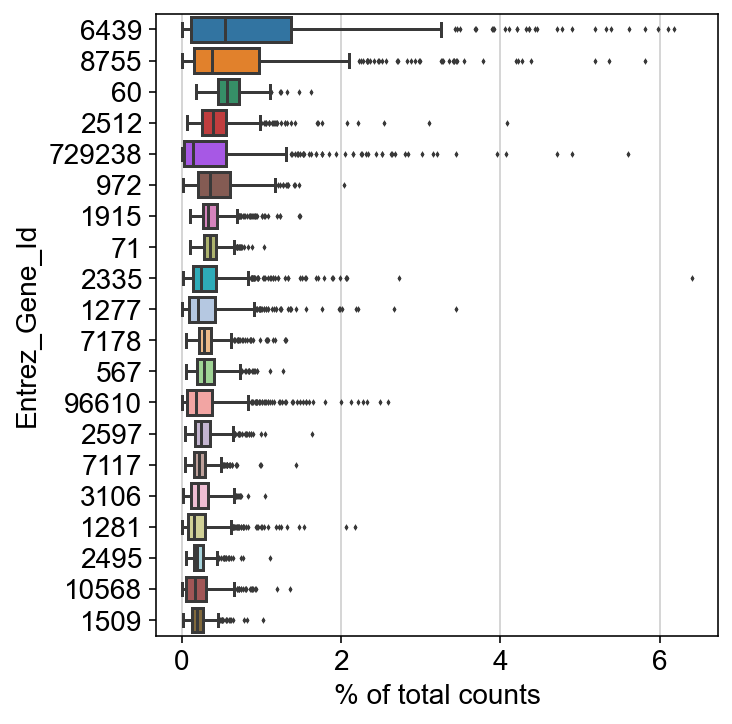

In [29]:
sc.pl.highest_expr_genes(data_gene, n_top=20, )
#Show those genes that yield the highest fraction of counts in each single cell, across all cells.

### Summary of highest count genes (n=5) (source: www.ncbi.nlm.nih.gov/gene/)

#### 6439: This gene encodes the pulmonary-associated surfactant protein B (SPB), an amphipathic surfactant protein essential for lung function and homeostasis after birth. Pulmonary surfactant is a surface-active lipoprotein complex composed of 90% lipids and 10% proteins which include plasma proteins and apolipoproteins SPA, SPB, SPC and SPD. The surfactant is secreted by the alveolar cells of the lung and maintains the stability of pulmonary tissue by reducing the surface tension of fluids that coat the lung. The SPB enhances the rate of spreading and increases the stability of surfactant monolayers in vitro. Multiple mutations in this gene have been identified, which cause pulmonary surfactant metabolism dysfunction type 1, also called pulmonary alveolar proteinosis due to surfactant protein B deficiency, and are associated with fatal respiratory distress in the neonatal period. Alternatively spliced transcript variants encoding the same protein have been identified.[provided by RefSeq, Feb 2010]

#### 8755: Predicted to be located in external side of plasma membrane and sperm head plasma membrane. Predicted to be part of protein-containing complex. ** interesting as this is associated with testicular issues

#### 60: This gene encodes one of six different actin proteins. Actins are highly conserved proteins that are involved in cell motility, structure, integrity, and intercellular signaling. The encoded protein is a major constituent of the contractile apparatus and one of the two nonmuscle cytoskeletal actins that are ubiquitously expressed. Mutations in this gene cause Baraitser-Winter syndrome 1, which is characterized by intellectual disability with a distinctive facial appearance in human patients. Numerous pseudogenes of this gene have been identified throughout the human genome.

#### 2512: This gene encodes the light subunit of the ferritin protein. Ferritin is the major intracellular iron storage protein in prokaryotes and eukaryotes. It is composed of 24 subunits of the heavy and light ferritin chains. Variation in ferritin subunit composition may affect the rates of iron uptake and release in different tissues. A major function of ferritin is the storage of iron in a soluble and nontoxic state. Defects in this light chain ferritin gene are associated with several neurodegenerative diseases and hyperferritinemia-cataract syndrome. This gene has multiple pseudogenes.

#### 729238: This gene is one of several genes encoding pulmonary-surfactant associated proteins (SFTPA) located on chromosome 10. Mutations in this gene and a highly similar gene located nearby, which affect the highly conserved carbohydrate recognition domain, are associated with idiopathic pulmonary fibrosis. The current version of the assembly displays only a single centromeric SFTPA gene pair rather than the two gene pairs shown in the previous assembly which were thought to have resulted from a duplication. 

In [32]:
sc.tl.pca(data_gene, svd_solver='arpack')
sc.pp.neighbors(data_gene, n_neighbors=30, n_pcs=50)
sc.tl.umap(data_gene, min_dist=0.3)

computing PCA
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


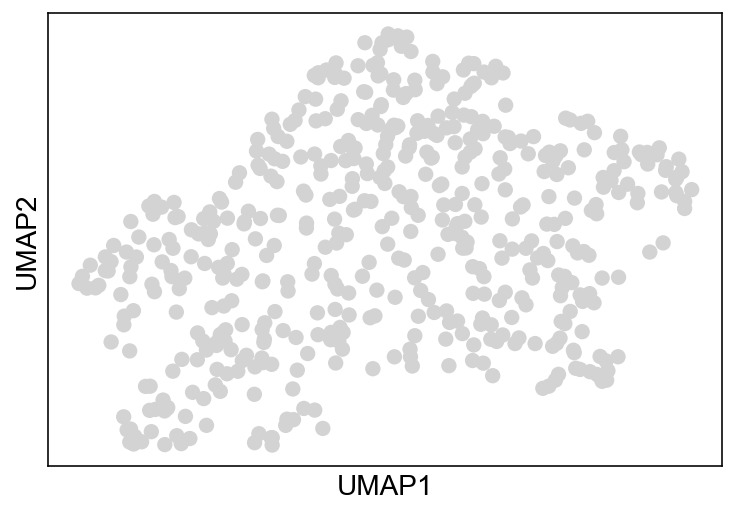

In [33]:
sc.pl.umap(data_gene) #note: can't seem to color by Entrez_Gene_Id, so unsure if this umap is incorrect

In [47]:
#sc.pl.pca(data_gene, color = ['Entrez_Gene_Id'])

## Leiden mapping

In [50]:
#!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 5.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.6 MB/s eta 0:00:0000:0100:01


In [51]:
sc.tl.leiden(data_gene, resolution=0.3, key_added="leiden_0.3")
sc.tl.leiden(data_gene, resolution=0.5, key_added="leiden_0.5")
sc.tl.leiden(data_gene, resolution=0.7, key_added="leiden_0.7")

running Leiden clustering
    finished: found 3 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden_0.7', the cluster labels (adata.obs, categorical) (0:00:00)


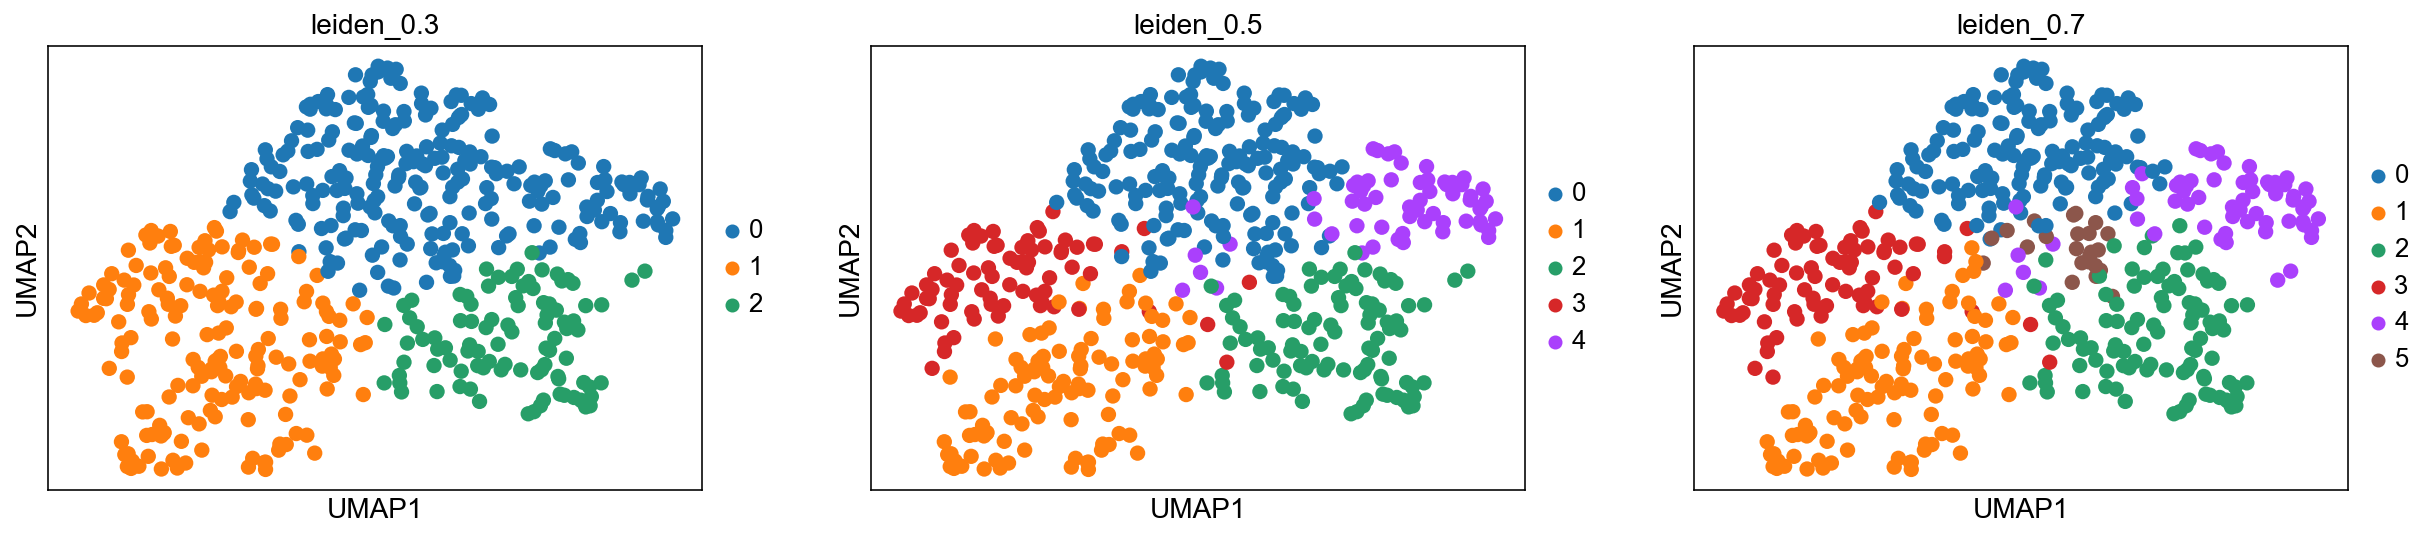

In [53]:
sc.pl.umap(data_gene, color=['leiden_0.3', 'leiden_0.5', 'leiden_0.7'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.7']`


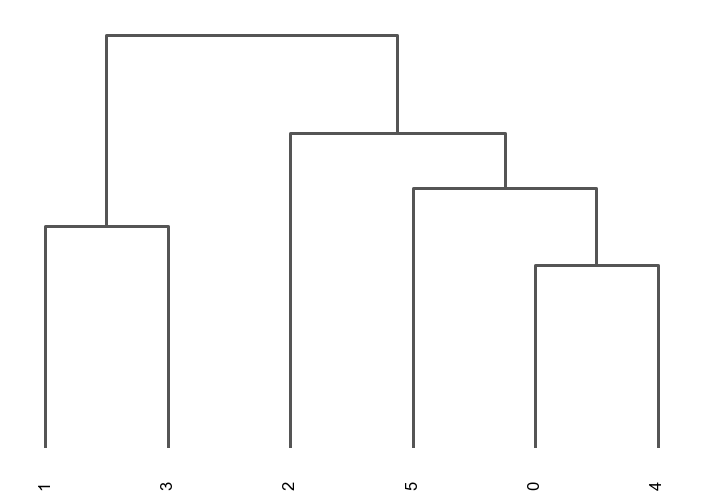

<AxesSubplot:>

In [56]:
sc.tl.dendrogram(data_gene, groupby="leiden_0.7")
sc.pl.dendrogram(data_gene, groupby="leiden_0.7")